In [13]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Loading Model

In [14]:
model = tf.keras.models.load_model('trained_model.keras')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

## Visualising Single image of Test set

!pip install opencv-python

In [16]:
import cv2

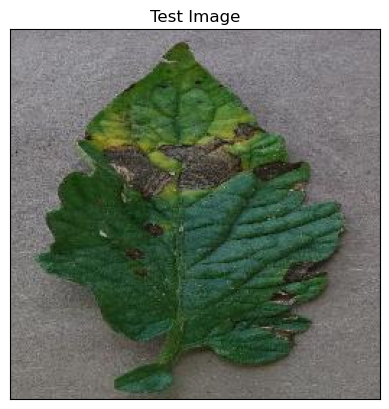

In [17]:
image_path = 'test/test/TomatoEarlyBlight4.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [18]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 94ms/step


(array([[4.9798778e-15, 2.8173476e-13, 1.2483182e-12, 1.4212205e-12,
         3.4732944e-15, 4.8687157e-15, 2.2009248e-14, 3.1253553e-13,
         4.9200160e-17, 2.8337945e-14, 1.4537559e-16, 1.4751116e-09,
         2.1146955e-03, 2.2183342e-11, 1.9513687e-15, 7.5107267e-15,
         2.7554259e-12, 1.9327367e-15, 1.6446519e-09, 1.9597435e-14,
         5.8950995e-12, 3.7258485e-06, 4.6321894e-14, 7.8514940e-13,
         3.8147836e-15, 1.3109512e-16, 6.7535103e-11, 2.1552512e-16,
         3.3866611e-11, 9.9356019e-01, 4.3213940e-03, 6.5037010e-11,
         7.4371638e-09, 4.1537399e-11, 1.9701317e-11, 9.3383374e-12,
         1.4121926e-12, 6.1733726e-15]], dtype=float32),
 (1, 38))

In [19]:
result_index = np.argmax(prediction) #Return index of max element
print(result_index)

29


In [20]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [21]:
file=open("label.txt","w")
for i in class_name:
    file.write(i+"\n")
file.close()

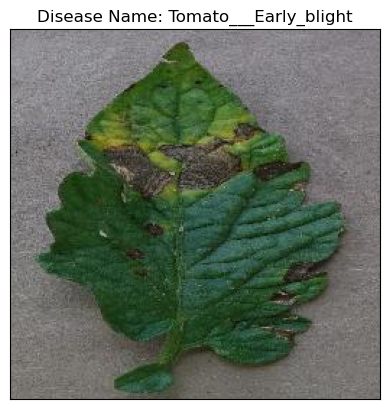

In [22]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()